In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from packages import general, bh, fmm
from packages.general import pairwise

In [14]:
num_particles = 1000

theta = 0.5
fmm_terms = 10

np.random.seed(0)

particles = [general.Particle(mass_like=True) for _ in range(num_particles)]

pair_method = pairwise.Pairwise(particles)
bh_CoM = bh.BH(particles, theta, 0)
bh_multi = bh.BH(particles, theta, fmm_terms-1)
fmm_method = fmm.FMM(particles, fmm_terms)
print([p.centre for p in particles])

[(0.5488135039273248+0.7151893663724195j), (0.5448831829968969+0.4236547993389047j), (0.4375872112626925+0.8917730007820798j), (0.3834415188257777+0.7917250380826646j), (0.5680445610939323+0.925596638292661j), (0.08712929970154071+0.02021839744032572j), (0.7781567509498505+0.8700121482468192j), (0.7991585642167236+0.46147936225293185j), (0.11827442586893322+0.6399210213275238j), (0.9446689170495839+0.5218483217500717j), (0.26455561210462697+0.7742336894342167j), (0.5684339488686485+0.018789800436355142j), (0.6120957227224214+0.6169339968747569j), (0.6818202991034834+0.359507900573786j), (0.6976311959272649+0.06022547162926983j), (0.6706378696181594+0.2103825610738409j), (0.31542835092418386+0.3637107709426226j), (0.43860151346232035+0.9883738380592262j), (0.2088767560948347+0.16130951788499626j), (0.2532916025397821+0.4663107728563063j), (0.15896958364551972+0.11037514116430513j), (0.1381829513486138+0.1965823616800535j), (0.8209932298479351+0.09710127579306127j), (0.09609840789396307+

In [15]:
pair_method.do_method()
dir_pots  = np.array([p.potential for p in particles])
dir_force = np.array([p.force_per for p in particles])

In [16]:
bh_CoM.do_method()
bh_CoM_pots =  np.array([p.potential for p in particles])
bh_CoM_force = np.array([p.force_per for p in particles])
bh_multi.do_method()
bh_multi_pots =  np.array([p.potential for p in particles])
bh_multi_force = np.array([p.force_per for p in particles])
fmm_method.do_method()
fmm_pots =  np.array([p.potential for p in particles])
fmm_force = np.array([p.force_per for p in particles])

In [17]:
bh_CoM_pots_frac    = abs((bh_CoM_pots - dir_pots) / dir_pots)
bh_multi_pots_frac  = abs((bh_multi_pots - dir_pots) / dir_pots)
fmm_pots_frac       = abs((fmm_pots - dir_pots) / dir_pots)

dir_force_mag     = np.linalg.norm(dir_force, axis=1)
dir_force_angle   = np.arctan2(dir_force[:,1], dir_force[:,0])
bh_CoM_force_mag     = np.linalg.norm(bh_CoM_force, axis=1)
bh_CoM_force_angle   = np.arctan2(bh_CoM_force[:,1], bh_CoM_force[:,0])
bh_multi_force_mag   = np.linalg.norm(bh_multi_force, axis=1)
bh_multi_force_angle = np.arctan2(bh_multi_force[:,1], bh_multi_force[:,0])
fmm_force_mag        = np.linalg.norm(fmm_force, axis=1)
fmm_force_angle      = np.arctan2(fmm_force[:,1], fmm_force[:,0])

bh_CoM_force_mag_frac   = abs((bh_CoM_force_mag - dir_force_mag) / dir_force_mag)
bh_multi_force_mag_frac = abs((bh_multi_force_mag - dir_force_mag) / dir_force_mag)
fmm_force_mag_frac      = abs((fmm_force_mag - dir_force_mag) / dir_force_mag)

delta = abs(bh_CoM_force_angle - dir_force_angle)   % (2*np.pi)
bh_CoM_force_angle_frac   = np.minimum(delta, 2*np.pi - delta) / 2*np.pi
delta = abs(bh_multi_force_angle - dir_force_angle) % (2*np.pi)
bh_multi_force_angle_frac = np.minimum(delta, 2*np.pi - delta) / 2*np.pi
delta = abs(fmm_force_angle - dir_force_angle)      % (2*np.pi)
fmm_force_angle_frac      = np.minimum(delta, 2*np.pi - delta) / 2*np.pi

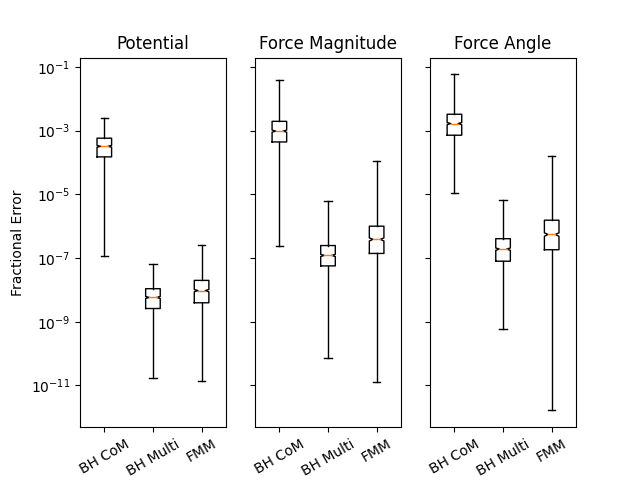

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey='all')

data_pots = [
    bh_CoM_pots_frac,
    bh_multi_pots_frac,
    fmm_pots_frac,
]
data_mag = [
    bh_CoM_force_mag_frac,
    bh_multi_force_mag_frac,
    fmm_force_mag_frac,
]
data_angle = [
    bh_CoM_force_angle_frac,
    bh_multi_force_angle_frac,
    fmm_force_angle_frac,
]

x_labels = [
    'BH CoM',
    'BH Multi',
    'FMM',
]

ax1.boxplot(data_pots,  notch=True, whis=(0,100))
ax2.boxplot(data_mag,   notch=True, whis=(0,100))
ax3.boxplot(data_angle, notch=True, whis=(0,100))

ax1.set_yscale('log')
ax1.set_ylabel('Fractional Error')
ax1.set_xticklabels(x_labels, rotation=30)
ax2.set_xticklabels(x_labels, rotation=30)
ax3.set_xticklabels(x_labels, rotation=30)
ax1.set_title('Potential')
ax2.set_title('Force Magnitude')
ax3.set_title('Force Angle');